<a href="https://colab.research.google.com/github/Vecheslav-Eremeev/keras_projects/blob/main/Keras_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense, LSTM, SimpleRNN, GRU
from keras.layers import Flatten, MaxPooling1D, GlobalMaxPooling1D, Conv1D
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Load Data

In [48]:
num_words = 10000

In [49]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

In [50]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [51]:
test_data.shape, test_labels.shape

((25000,), (25000,))

In [52]:
max_len = 100

In [53]:
X_train = pad_sequences(train_data, maxlen=max_len)

In [54]:
y_train = np.array(train_labels)

In [55]:
X_test = pad_sequences(test_data, maxlen=max_len)

In [56]:
y_test = np.array(test_labels)

Train Models

In [57]:
def train_model(model, epochs=10, batch_size=128):
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  callbacks_list = [
    EarlyStopping(monitor='val_acc', patience=5),
    ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True)
  ]
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15, callbacks=callbacks_list)

  print(model.evaluate(X_test, y_test))
  return history

In [58]:
def show_loss_model(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_plot = np.arange(1, len(loss) + 1)
  plt.clf()

  plt.plot(epochs_plot, loss, 'r', label='Training loss')
  plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [59]:
def show_accuracy_model(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  epochs_plot = np.arange(1, len(acc) + 1)
  plt.clf()

  plt.plot(epochs_plot, acc, 'r', label='Training acc')
  plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation acc')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

Dense Model

In [60]:
model = Sequential([
                    Embedding(num_words, 8, input_length=max_len),
                    Flatten(),
                    Dense(32, activation='relu'),
                    Dropout(0.5),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                25632     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 105,665
Trainable params: 105,665
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = train_model(model, epochs=20)

Epoch 1/20
167/167 [==============================] - 2s 8ms/step - loss: 0.6713 - acc: 0.5838 - val_loss: 0.5364 - val_acc: 0.7781
Epoch 2/20
167/167 [==============================] - 1s 7ms/step - loss: 0.3804 - acc: 0.8385 - val_loss: 0.3438 - val_acc: 0.8475
Epoch 3/20
167/167 [==============================] - 1s 7ms/step - loss: 0.2448 - acc: 0.9078 - val_loss: 0.3450 - val_acc: 0.8475
Epoch 4/20
167/167 [==============================] - 1s 7ms/step - loss: 0.1638 - acc: 0.9466 - val_loss: 0.3827 - val_acc: 0.8405
Epoch 5/20
167/167 [==============================] - 1s 7ms/step - loss: 0.1003 - acc: 0.9739 - val_loss: 0.4265 - val_acc: 0.8357
Epoch 6/20
167/167 [==============================] - 1s 7ms/step - loss: 0.0566 - acc: 0.9890 - val_loss: 0.4857 - val_acc: 0.8347
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 0.5382 - acc: 0.8319
[0.5382320880889893, 0.8319200277328491]


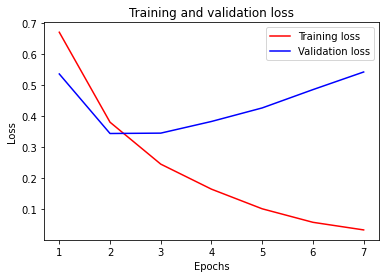

In [62]:
show_loss_model(history)

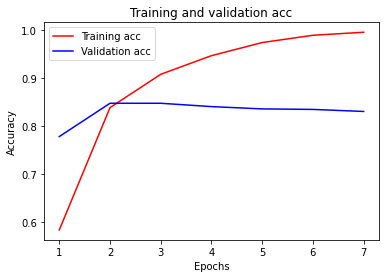

In [63]:
show_accuracy_model(history)

SimpleRNN Model

In [64]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    SimpleRNN(16, return_sequences=True),
                    SimpleRNN(16),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 16)           160000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 100, 16)           528       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 161,073
Trainable params: 161,073
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = train_model(model)

Epoch 1/10
167/167 [==============================] - 54s 310ms/step - loss: 0.6875 - acc: 0.5372 - val_loss: 0.6669 - val_acc: 0.5843
Epoch 2/10
167/167 [==============================] - 50s 298ms/step - loss: 0.5045 - acc: 0.7600 - val_loss: 0.4237 - val_acc: 0.8117
Epoch 3/10
167/167 [==============================] - 53s 316ms/step - loss: 0.2648 - acc: 0.8957 - val_loss: 0.4225 - val_acc: 0.8208
Epoch 4/10
167/167 [==============================] - 53s 315ms/step - loss: 0.1294 - acc: 0.9570 - val_loss: 0.5397 - val_acc: 0.7912
Epoch 5/10
167/167 [==============================] - 50s 302ms/step - loss: 0.0549 - acc: 0.9847 - val_loss: 0.6582 - val_acc: 0.7968
Epoch 6/10
167/167 [==============================] - 51s 305ms/step - loss: 0.0258 - acc: 0.9940 - val_loss: 0.7421 - val_acc: 0.7883
Epoch 7/10
167/167 [==============================] - 55s 327ms/step - loss: 0.0108 - acc: 0.9982 - val_loss: 0.8462 - val_acc: 0.7840
Epoch 8/10
782/782 [==============================] - 2

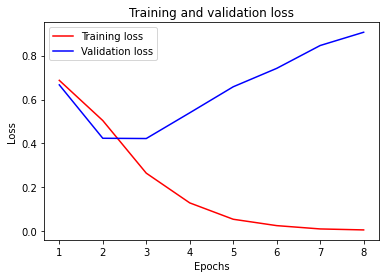

In [66]:
show_loss_model(history)

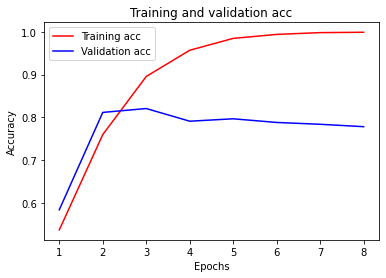

In [67]:
show_accuracy_model(history)

LSTM Model

In [68]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    LSTM(64, return_sequences=True),
                    LSTM(32),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 16)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 64)           20736     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 193,185
Trainable params: 193,185
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = train_model(model)

Epoch 1/10
167/167 [==============================] - 13s 53ms/step - loss: 0.4925 - acc: 0.7401 - val_loss: 0.4361 - val_acc: 0.8128
Epoch 2/10
167/167 [==============================] - 8s 46ms/step - loss: 0.3105 - acc: 0.8757 - val_loss: 0.3482 - val_acc: 0.8467
Epoch 3/10
167/167 [==============================] - 8s 46ms/step - loss: 0.2247 - acc: 0.9161 - val_loss: 0.3922 - val_acc: 0.8440
Epoch 4/10
167/167 [==============================] - 8s 46ms/step - loss: 0.1867 - acc: 0.9330 - val_loss: 0.3981 - val_acc: 0.8333
Epoch 5/10
167/167 [==============================] - 8s 47ms/step - loss: 0.1576 - acc: 0.9449 - val_loss: 0.4433 - val_acc: 0.8296
Epoch 6/10
167/167 [==============================] - 8s 46ms/step - loss: 0.1329 - acc: 0.9547 - val_loss: 0.4933 - val_acc: 0.8253
Epoch 7/10
782/782 [==============================] - 13s 17ms/step - loss: 0.5165 - acc: 0.8150
[0.5165125131607056, 0.8150399923324585]


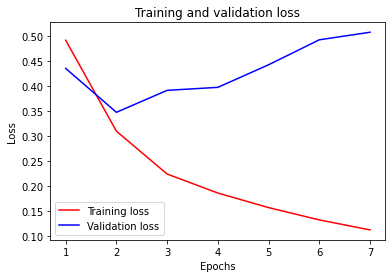

In [70]:
show_loss_model(history)

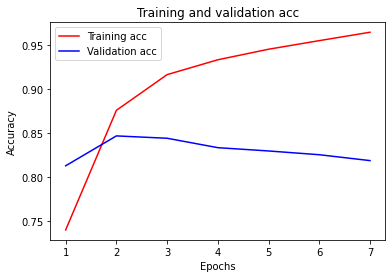

In [71]:
show_accuracy_model(history)

GRU Model

In [72]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    GRU(64, return_sequences=True),
                    GRU(64),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 16)           160000    
                                                                 
 gru_2 (GRU)                 (None, 100, 64)           15744     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 200,769
Trainable params: 200,769
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = train_model(model)

Epoch 1/10
167/167 [==============================] - 13s 57ms/step - loss: 0.4872 - acc: 0.7464 - val_loss: 0.3781 - val_acc: 0.8413
Epoch 2/10
167/167 [==============================] - 8s 48ms/step - loss: 0.2821 - acc: 0.8852 - val_loss: 0.3698 - val_acc: 0.8315
Epoch 3/10
167/167 [==============================] - 8s 48ms/step - loss: 0.2279 - acc: 0.9105 - val_loss: 0.4967 - val_acc: 0.8277
Epoch 4/10
167/167 [==============================] - 8s 48ms/step - loss: 0.1900 - acc: 0.9278 - val_loss: 0.3997 - val_acc: 0.8317
Epoch 5/10
167/167 [==============================] - 8s 48ms/step - loss: 0.1514 - acc: 0.9466 - val_loss: 0.5006 - val_acc: 0.8349
Epoch 6/10
782/782 [==============================] - 14s 17ms/step - loss: 0.5954 - acc: 0.8146
[0.5954159498214722, 0.8145999908447266]


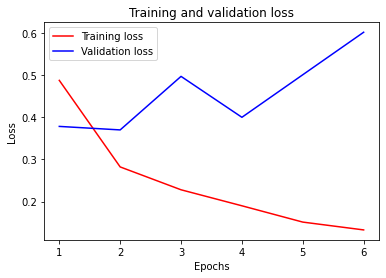

In [74]:
show_loss_model(history)

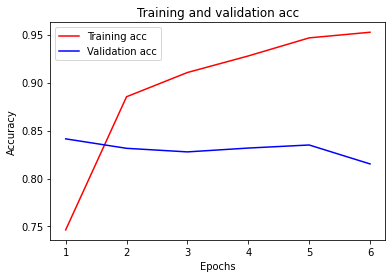

In [75]:
show_accuracy_model(history)

Conv1d Model

In [76]:
model = Sequential([
                    Embedding(num_words, 16, input_length=max_len),
                    Conv1D(64, 7, activation='relu'),
                    SpatialDropout1D(0.5),
                    MaxPooling1D(3),
                    Conv1D(128, 5, activation='relu'),
                    GlobalMaxPooling1D(),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 16)           160000    
                                                                 
 conv1d_6 (Conv1D)           (None, 94, 64)            7232      
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 94, 64)           0         
 lDropout1D)                                                     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 31, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 27, 128)           41088     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 128)            

In [77]:
train_model(model)

Epoch 1/10
167/167 [==============================] - 3s 13ms/step - loss: 0.6031 - acc: 0.6414 - val_loss: 0.4126 - val_acc: 0.8128
Epoch 2/10
167/167 [==============================] - 2s 11ms/step - loss: 0.3713 - acc: 0.8384 - val_loss: 0.3819 - val_acc: 0.8240
Epoch 3/10
167/167 [==============================] - 2s 11ms/step - loss: 0.2787 - acc: 0.8866 - val_loss: 0.3960 - val_acc: 0.8264
Epoch 4/10
167/167 [==============================] - 2s 11ms/step - loss: 0.2157 - acc: 0.9147 - val_loss: 0.4424 - val_acc: 0.8211
Epoch 5/10
167/167 [==============================] - 2s 11ms/step - loss: 0.1684 - acc: 0.9367 - val_loss: 0.5185 - val_acc: 0.8131
Epoch 6/10
167/167 [==============================] - 2s 11ms/step - loss: 0.1369 - acc: 0.9477 - val_loss: 0.6003 - val_acc: 0.8080
Epoch 7/10
167/167 [==============================] - 2s 11ms/step - loss: 0.1138 - acc: 0.9578 - val_loss: 0.6613 - val_acc: 0.8101
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - l

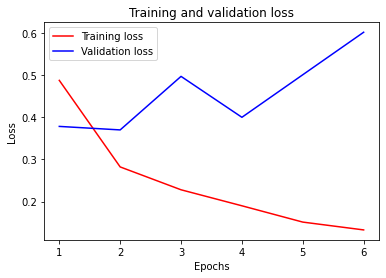

In [78]:
show_loss_model(history)

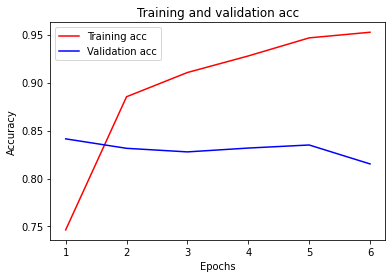

In [79]:
show_accuracy_model(history)